In [1]:
import sqlite3
conn = sqlite3.connect('yureba.sqlite3')
cursor = conn.cursor()


# #კოდის ფრაგმენტი , რომლის მეშვეობითაც ბაზიდან მოგვაქვს მხოლოდ ის ფილმები რომელთა ჟანრი არის დრამა
res_select = cursor.execute("SELECT * FROM yureba WHERE genre='Drama'")
results=cursor.fetchall()
for row in results:
    print(row)

#
u_name = input('enter name: ')
u_rating = input('rating: ')
u_genre = input('genre: ')
u_year = int(input('year: '))
u_release_date = input('release date: ')
u_score = input('score: ')
u_votes = int(input('votes: '))
u_director = input('director: ')
u_writer = input('writer: ')
u_star = input('star: ')
u_country = input('country: ')

# #ცხრილში ვამატებთ ახალ ჩანაწერს (INSERT ფუნქციით) ზემოთ დაწერილი input ბრძნებით შეყვანილი მონაცემების მიხედვით.
cursor.execute("INSERT INTO yureba (name,rating,genre,year,released,score,votes,director,writer,star,country) VALUES (?,?,?,?,?,?,?,?,?,?,?)"
,(u_name, u_rating, u_genre, u_year, u_release_date, u_score, u_votes, u_director, u_writer, u_star, u_country
))

# #ვანახლებთ ბაზას და ვცვლით იმ ფილმების მონაცემებს , რომელთ რეკორდიც(score) არის 7 მომხმარებლის მიერ შეყვანილი მონაცემებით
cursor.execute("UPDATE yureba SET name=?, rating=?, genre=?, year=?, released=?, score=?, votes=?, director=?, writer=?, star=?, country=? WHERE score='7'",
   (u_name, u_rating, u_genre, u_year, u_release_date,u_score, u_votes, u_director, u_writer, u_star, u_country)
)


# #წაშლა.ბაზიდან ვშლით იმ ფილმს რომლის სახელსაც შეიყვანს მომხმარებელი.
name=input('შეიყვანეთ წასაშლელი ფილმის სახელი: ')
cursor.execute("DELETE FROM yureba WHERE name = ?", (name,))

print(f"ჩანაწერი '{name}' წარმატებით წაიშალა.")


res = cursor.execute("SELECT * FROM yureba")
for each in res:
    print (each)


('Ordinary People', 'R', 'Drama', 1980, 'September 19, 1980 (United States)', 7.7, 49000, 'Robert Redford', 'Judith Guest', 'Donald Sutherland', 'United States')
('Somewhere in Time', 'PG', 'Drama', 1980, 'October 3, 1980 (United States)', 7.2, 27000, 'Jeannot Szwarc', 'Richard Matheson', 'Christopher Reeve', 'United States')
('Fame', 'R', 'Drama', 1980, 'May 16, 1980 (United States)', 6.6, 21000, 'Alan Parker', 'Christopher Gore', 'Eddie Barth', 'United States')
('Urban Cowboy', 'PG', 'Drama', 1980, 'June 6, 1980 (United States)', 6.4, 14000, 'James Bridges', 'Aaron Latham', 'John Travolta', 'United States')
('Cattle Annie and Little Britches', 'PG', 'Drama', 1980, 'April 24, 1981 (United States)', 6.1, 604, 'Lamont Johnson', 'David Eyre', 'Scott Glenn', 'United States')
('The Jazz Singer', 'PG', 'Drama', 1980, 'December 19, 1980 (United States)', 5.9, 4000, 'Richard Fleischer', 'Samson Raphaelson', 'Laurence Olivier', 'United States')
('Breaker Morant', 'PG', 'Drama', 1980, 'July 3, 

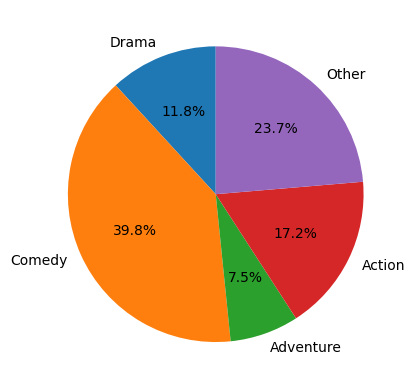

In [5]:
#გრაფა 1(ჟანრების მიხედვით წრიულ დიაგრამაზე პროცენტულობის გამოსახვა)

#პროცენტულობის დათვლა ჟანრების მიხედვით:
def count_genre(genre):
    return cursor.execute('SELECT count(*) FROM yureba WHERE genre=?', (genre,)).fetchone()[0]
def percentage(genre,sum):
    return genre/100*sum

c_drama = count_genre('Drama')
c_comedy = count_genre('Comedy')
c_adventure = count_genre('Adventure')
c_action = count_genre('Action')
c_other = (
    count_genre('Biography') +
    count_genre('Horror') +
    count_genre('Crime') +
    count_genre('Animation') +
    count_genre('Sci-Fi') +
    count_genre('Fantasy')
)
labels = ['Drama', 'Comedy', 'Adventure', 'Action', 'Other']
sizes = [c_drama, c_comedy, c_adventure, c_action, c_other]



import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.1f%%',startangle=90)
plt.show()

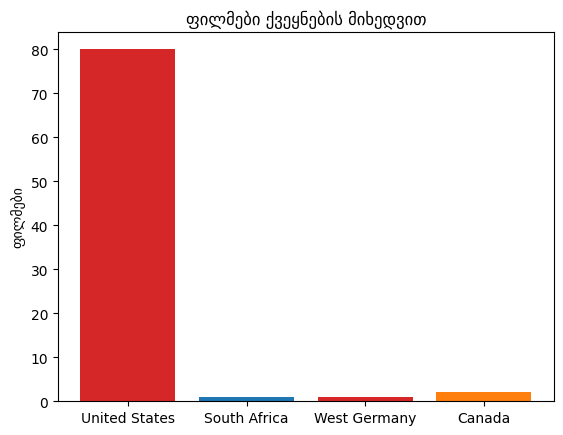

In [6]:
#გრაფა 2(ქვეყნების მიხედვით რამდენი ფილმი გამოიშვა თითოეულ ქვეყანაში)
fig, ax = plt.subplots()

countries = ['United States','South Africa','West Germany','Canada']
def count_country(country):
    return cursor.execute('SELECT count(*) FROM yureba WHERE country=?', (country,)).fetchone()[0]


c1=count_country('United States')
c2=count_country('South Africa')
c3=count_country('West Germany')
c4=count_country('Canada')


counts = [c1,c2,c3,c4]
bar_labels = ['United States', 'Sount Africa', 'West Germany','Canada']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(countries, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('ფილმები')
ax.set_title('ფილმები ქვეყნების მიხედვით')

plt.show()

In [ ]:
#გრაფა 3(1980დან 1981 წლამდე ფილმების რაოდენობის სტატისტიკა)
def count_movies(year):
    return cursor.execute('SELECT count(*) FROM yureba WHERE year=?', (year,)).fetchone()[0]

y1=count_movies(1980)
y2=count_movies(1981)
x = [1980,1981]
y = [y1,y2]

plt.plot(x, y)
plt.title("1980დან 1981 წლამდე ფილმების რაოდენობის სტატისტიკა")
plt.xlabel('წლები')
plt.ylabel('რაოდენობა')


plt.show()


conn.commit()
conn.close()
